In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style("dark")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df['salary']

0      270000.0
1      200000.0
2      250000.0
3           NaN
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         NaN
Name: salary, Length: 215, dtype: float64

In [6]:
df['status']

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [7]:
men_placed = np.sum((df['gender']=='M') & (df['status'] == 'Placed'))
men_not_placed = np.sum((df['gender']=='M') & (df['status'] == 'Not Placed'))
women_placed = np.sum((df['gender']=='F') & (df['status'] == 'Not Placed'))
women_not_placed = np.sum((df['gender']=='F') & (df['status'] == 'Placed'))

In [8]:
men_placed, men_not_placed, women_placed, women_not_placed

(100, 39, 28, 48)

## Exploratory Data Analysis

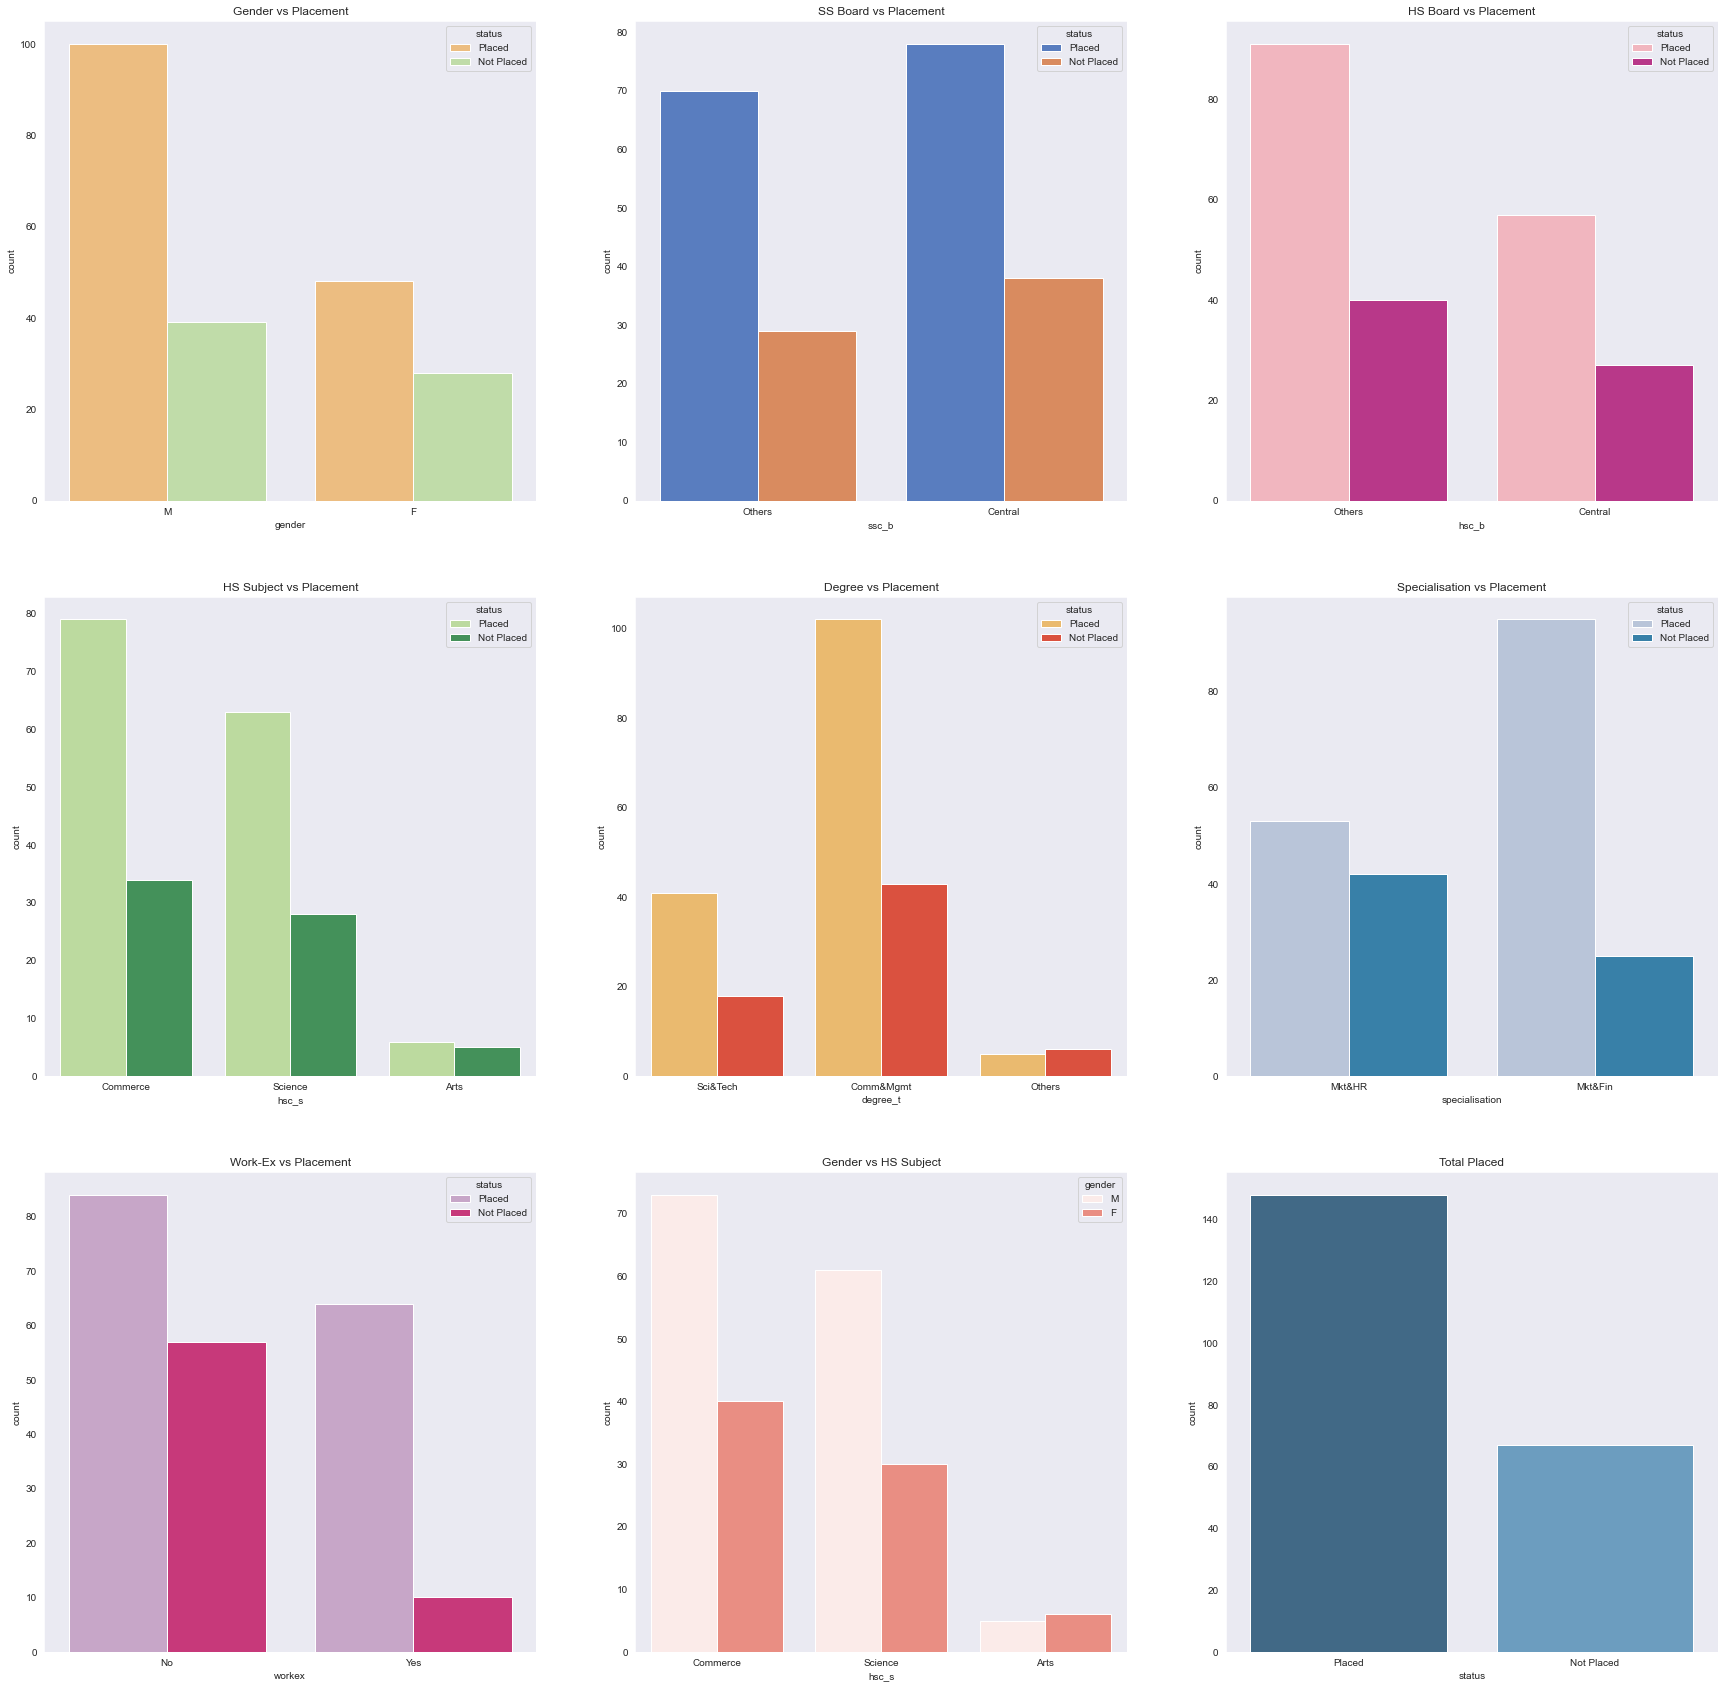

In [9]:
fig, ax = plt.subplots(figsize = (30, 30), nrows = 3, ncols = 3)

ax[0][0].set_title("Gender vs Placement")
sns.countplot(data = df, x = 'gender', hue = 'status', ax = ax[0][0], palette = "Spectral")

ax[0][1].set_title("SS Board vs Placement")
sns.countplot(data = df, x = 'ssc_b', hue = 'status', ax = ax[0][1], palette = "muted")

ax[0][2].set_title("HS Board vs Placement")
sns.countplot(data = df, x = 'hsc_b', hue = 'status', ax = ax[0][2], palette = "RdPu")

ax[1][0].set_title("HS Subject vs Placement")
sns.countplot(data = df, x = 'hsc_s', hue = 'status', ax = ax[1][0], palette = "YlGn")

ax[1][1].set_title("Degree vs Placement")
sns.countplot(data = df, x = 'degree_t', hue = 'status', ax = ax[1][1], palette = "YlOrRd")

ax[1][2].set_title("Specialisation vs Placement")
sns.countplot(data = df, x = 'specialisation', hue = 'status', ax = ax[1][2], palette = "PuBu")

ax[2][0].set_title("Work-Ex vs Placement")
sns.countplot(data = df, x = 'workex', hue = 'status', ax = ax[2][0], palette = "PuRd")

ax[2][1].set_title("Gender vs HS Subject")
sns.countplot(data = df, x = 'hsc_s', hue = 'gender', ax = ax[2][1], color = "Salmon")

ax[2][2].set_title("Total Placed")
sns.countplot(data = df, x = 'status', palette = "Blues_d")

fig.savefig("Properties.jpg")

## Preliminary Conculsions

* Higher Secondary and Senior Secondary Boards do not have a huge impact on Placement as the ratio of Place/Not Placed is similar for both

* Commerce Students are more preferred as compared to Science Students and Arts students are the least preferred of all

* Very few candidates with Work-Experience were not placed, which shows that candidates with prior experience are preferred.

* Applicants who specialise in Finance are more preferred for placements as compared to people in HR

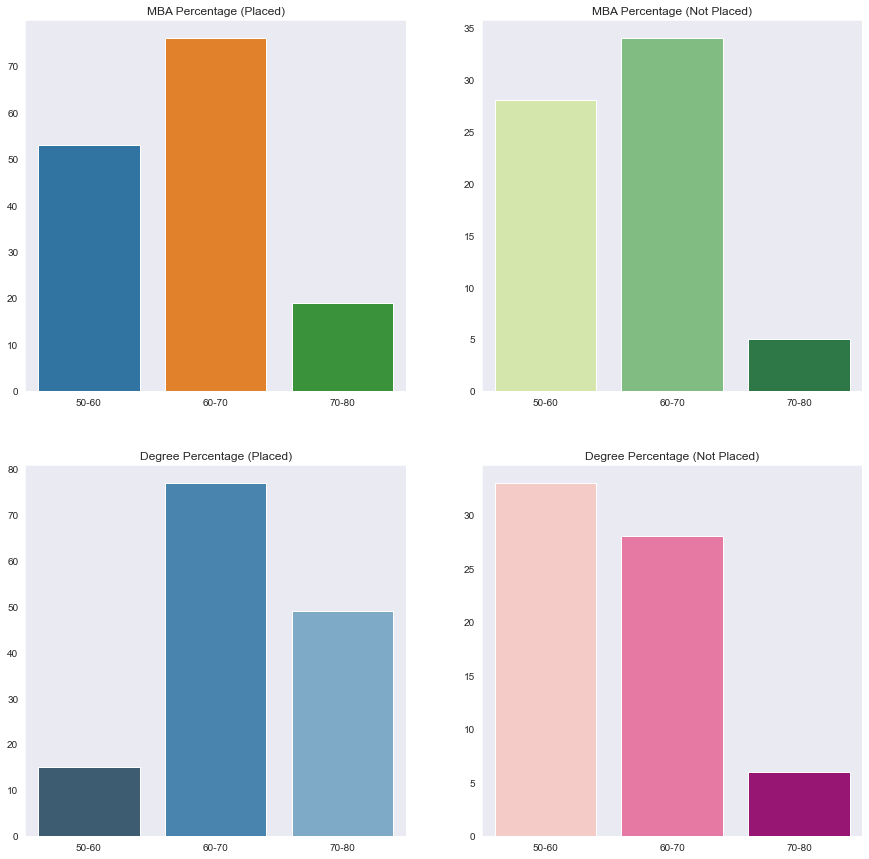

In [10]:
fig, ax = plt.subplots(figsize = (15, 15), nrows = 2, ncols = 2)

not_placed = df[df['status'] == 'Placed' ]
mba_np = not_placed['mba_p'] 
mba_np_ranges = pd.cut(mba_np, bins = [50, 60, 70, 80], include_lowest = True).value_counts(sort = False)
mba_ndict = {'50-60':mba_np_ranges[0], '60-70':mba_np_ranges[1], '70-80':mba_np_ranges[2]}
ax[0][0].set_title("MBA Percentage (Placed)")
sns.barplot(x = ['50-60', '60-70', '70-80'], y = list(mba_ndict.values()), ax = ax[0][0])

not_placed = df[df['status'] == 'Not Placed' ]
mba_np = not_placed['mba_p'] 
mba_np_ranges = pd.cut(mba_np, bins = [50, 60, 70, 80], include_lowest = True).value_counts(sort = False)
mba_ndict = {'50-60':mba_np_ranges[0], '60-70':mba_np_ranges[1], '70-80':mba_np_ranges[2]}
ax[0][1].set_title("MBA Percentage (Not Placed)")
sns.barplot(x = ['50-60', '60-70', '70-80'], y = list(mba_ndict.values()), ax = ax[0][1], palette = "YlGn")

not_placed = df[df['status'] == 'Not Placed' ]
mba_np = not_placed['degree_p'] 
mba_np_ranges = pd.cut(mba_np, bins = [50, 60, 70, 80], include_lowest = True).value_counts(sort = False)
mba_ndict = {'50-60':mba_np_ranges[0], '60-70':mba_np_ranges[1], '70-80':mba_np_ranges[2]}
ax[1][1].set_title("Degree Percentage (Not Placed)")
sns.barplot(x = ['50-60', '60-70', '70-80'], y = list(mba_ndict.values()), ax = ax[1][1], palette = "RdPu")

not_placed = df[df['status'] == 'Placed' ]
mba_np = not_placed['degree_p'] 
mba_np_ranges = pd.cut(mba_np, bins = [50, 60, 70, 80], include_lowest = True).value_counts(sort = False)
mba_ndict = {'50-60':mba_np_ranges[0], '60-70':mba_np_ranges[1], '70-80':mba_np_ranges[2]}
ax[1][0].set_title("Degree Percentage (Placed)")
sns.barplot(x = ['50-60', '60-70', '70-80'], y = list(mba_ndict.values()), ax = ax[1][0], palette = "Blues_d")

fig.savefig("Percentage.jpg")

## Dataframe 

In [11]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [12]:
y = df['status']

In [13]:
X = df.drop('status', axis = 1)

In [14]:
X.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0


### Salary offer has no effect on the candidate getting placed

In [15]:
X = X.drop('salary', axis = 1)
X = X.drop('sl_no', axis = 1)

In [16]:
X.info() # Checking for Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
dtypes: float64(5), object(7)
memory usage: 20.3+ KB


In [17]:
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [18]:
copy = X.copy()

In [19]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
dtypes: float64(5), object(7)
memory usage: 20.3+ KB


In [20]:
copy = pd.get_dummies(copy)

In [21]:
copy

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,0,1,1,0,0,...,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,0,1,1,0,1,...,1,0,0,1,0,0,1,0,1,0
3,56.00,52.00,52.00,66.0,59.43,0,1,1,0,1,...,0,0,1,0,0,1,1,0,0,1
4,85.80,73.60,73.30,96.8,55.50,0,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
211,58.00,60.00,72.00,74.0,53.62,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0
212,67.00,67.00,73.00,59.0,69.72,0,1,0,1,0,...,0,1,0,1,0,0,0,1,1,0
213,74.00,66.00,58.00,70.0,60.23,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1


### Splitting Data 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(copy, y, test_size = 0.1)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((193, 21), (193,), (22, 21), (22,))

In [24]:
X_train.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
145,89.40,65.66,71.25,72.00,63.23,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,1
53,80.00,70.00,72.00,87.00,71.04,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,1
134,77.44,92.00,72.00,94.00,67.13,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
23,77.40,60.00,64.74,92.00,63.62,1,0,0,1,0,...,0,0,1,0,0,1,0,1,1,0
202,70.00,63.00,66.00,61.28,60.11,0,1,1,0,1,...,0,0,1,0,0,1,1,0,0,1


In [25]:
from sklearn.preprocessing import StandardScaler
def scale_column(train, test, name):
    
    """
    Normalize Data in the dataset
    train: Training Dataset
    test: Test Dataset
    name: Column Name
    """
    
    scale = StandardScaler()
    column = train[name]
    train_data = np.array([column.to_list()]).T
    scaled_train = scale.fit_transform(train_data)
    
    test_data = np.array([test[name].to_list()]).T
    scaled_test = scale.transform(test_data)
    
    train[name] = scaled_train
    test[name] = scaled_test

In [26]:
scale_column(X_train, X_test, 'ssc_p')
scale_column(X_train, X_test, 'hsc_p')
scale_column(X_train, X_test, 'degree_p')
scale_column(X_train, X_test, 'etest_p')
scale_column(X_train, X_test, 'mba_p')

In [27]:
X_train

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
145,2.050297,-0.057804,0.682341,-0.005889,0.141863,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,1
53,1.174801,0.337668,0.785570,1.129143,1.463953,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,1
134,0.936368,2.342363,0.785570,1.658825,0.802062,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
23,0.932643,-0.573557,-0.213690,1.507487,0.207883,1,0,0,1,0,...,0,0,1,0,0,1,0,1,1,0
202,0.243423,-0.300190,-0.040265,-0.817059,-0.386295,0,1,1,0,1,...,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1.826766,0.702158,-0.177904,0.221118,1.675555,0,1,1,0,1,...,0,0,1,0,0,1,0,1,0,1
28,0.873035,0.929964,0.166194,0.096264,0.297602,0,1,0,1,0,...,0,1,0,1,0,0,0,1,1,0
75,-0.781094,-0.391312,1.542586,0.145449,0.780055,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
205,-0.594818,-0.391312,-0.177904,-0.762577,-0.944925,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0


In [28]:
scale_column(X_train, X_test, 'ssc_p')

In [29]:
X_test.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
106,-0.587367,-1.484782,-1.691935,-0.081558,0.558296,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0
123,0.615974,-0.664680,0.923210,-0.913915,-0.963546,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
35,0.150285,1.066648,0.785570,-0.081558,0.058915,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
142,1.640491,-0.573557,0.982394,-0.913915,-0.186543,0,1,1,0,0,...,0,0,1,0,0,1,0,1,1,0
82,-0.408542,0.064300,1.060849,0.750799,-0.330432,0,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0


## Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

### RandomForest Classifier

In [31]:
RFC = RandomForestClassifier()
parameters = {'n_estimators': np.linspace(100, 150, 10, dtype='int32'),
              'max_depth': [5, 6, 7, 9, 10],
              'max_features': ["auto", "sqrt"]}

In [32]:
clf = GridSearchCV(RFC, param_grid=parameters)

In [33]:
clf.fit(X_train, y_train, )

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': array([100, 105, 111, 116, 122, 127, 133, 138, 144, 150])})

In [34]:
clf.best_params_

{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 100}

In [35]:
clf.score(X_train, y_train)

1.0

In [36]:
clf.score(X_test, y_test)

0.8636363636363636

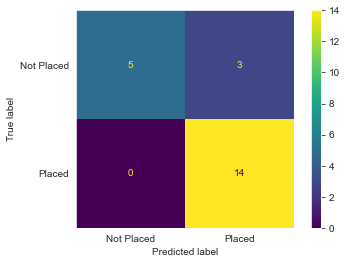

In [37]:
plot_confusion_matrix(clf, X_test, y_test)

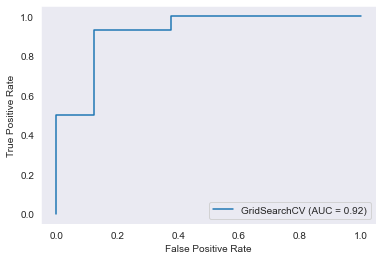

In [38]:
plot_roc_curve(clf, X_test, y_test)

In [39]:
rf_final = clf.predict(X_test)

### KNeighbours Classifier

In [40]:
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [41]:
knc.score(X_train, y_train)

0.8756476683937824

In [42]:
knc.score(X_test, y_test)

0.8636363636363636

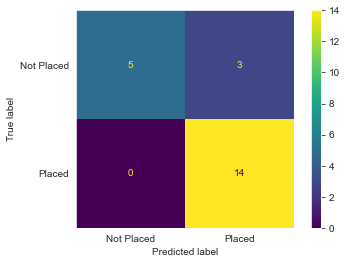

In [43]:
plot_confusion_matrix(clf, X_test, y_test)

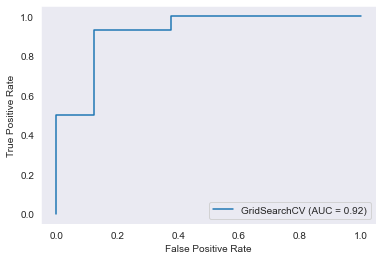

In [44]:
plot_roc_curve(clf, X_test, y_test)

In [45]:
knn_final = clf.predict(X_test)

### SGD Classifier

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn import svm

In [47]:
sgd = SGDClassifier()
parameters = {'loss': ['hinge', 'log', 'squared_hinge'],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'alpha': [0.0001, 0.0002, 0.0003, 0.0009, 0.001, 0.008, 0.1, 0.003, 0.002],
              }

In [48]:
clf = GridSearchCV(sgd, param_grid=parameters)

In [49]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0009, 0.001, 0.008,
                                   0.1, 0.003, 0.002],
                         'loss': ['hinge', 'log', 'squared_hinge'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [50]:
clf.best_params_

{'alpha': 0.0002, 'loss': 'log', 'penalty': 'elasticnet'}

In [51]:
clf.score(X_train, y_train)

0.9119170984455959

In [52]:
clf.score(X_test, y_test)

0.8181818181818182

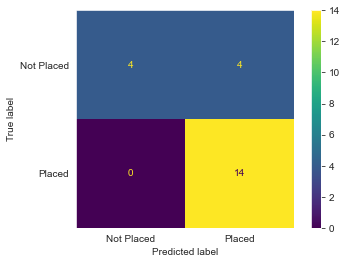

In [53]:
plot_confusion_matrix(clf, X_test, y_test)

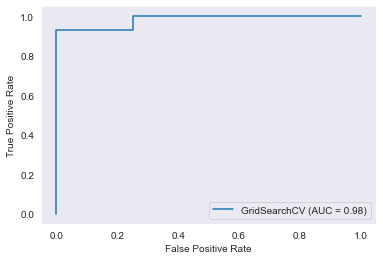

In [54]:
plot_roc_curve(clf, X_test, y_test)

In [55]:
sgd_final = clf.predict(X_test)

### SVM

In [56]:
svm = svm.SVC()
parameters = {'kernel': ['lienar', 'poly', 'rbf', 'sigmoid', ],
              'degree': [1, 2, 3, 4, 5],
              'gamma': ['scale', 'auto']}

In [57]:
clf = GridSearchCV(svm , param_grid=parameters)

In [58]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['lienar', 'poly', 'rbf', 'sigmoid']})

In [59]:
clf.best_params_

{'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [60]:
clf.score(X_train, y_train)

0.927461139896373

In [61]:
clf.score(X_test, y_test)

0.8181818181818182

In [62]:
svm_final = clf.predict(X_test)